# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 5 - Use k-Means Clustering to Group Employees into Clusters

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling pickle file into a Pandas dataframe called churn_model2. **

In [3]:
churn_model2 = pd.read_pickle('../data/churn_modeling_data.pickle')

** Drop Churn target variable and include only predictor features in churn_model2 dataframe for k-means clustering. **

In [4]:
churn_pred_feat = churn_model2.drop(['Churn'], axis=1)

** Center and scale all predictor features. **

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
churn_pred_feat_scaled = scaler.fit_transform(churn_pred_feat)

** Using scaled predictor features, determine how many clusters will yield the highest silhouette score combined with the lowest possible inertia. **

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [8]:
k_range2 = range(2, 11)

sil_scores1 = []
clus_inertia1 = []

for k in k_range2:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(churn_pred_feat_scaled)
    sil_scores1.append(metrics.silhouette_score(churn_pred_feat_scaled, km.labels_).round(3))
    clus_inertia1.append(km.inertia_.round(3))
    
print(sil_scores1)
print(clus_inertia1)

[0.165, 0.182, 0.18, 0.178, 0.161, 0.142, 0.155, 0.157, 0.145]
[12584.437, 11155.616, 10019.114, 9222.795, 8757.186, 8395.91, 8009.325, 7749.454, 7508.134]


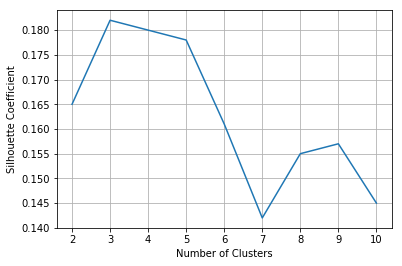

In [9]:
plt.plot(k_range2, sil_scores1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

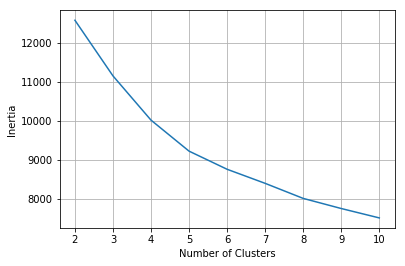

In [10]:
plt.plot(k_range2, clus_inertia1)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

* The employees in the churn dataframe can be grouped into 3 clusters using k-means clustering and features for predicting churn.

** Group employees in churn_model2 dataframe into 3 clusters. **

In [11]:
kmeans_3s = KMeans(n_clusters=3, random_state=123)
kmeans_3s.fit(churn_pred_feat_scaled)
churn_pred_feat['cluster'] = kmeans_3s.labels_
churn_pred_feat.sort_values('cluster').head()

Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
1087   34                 7                        1               2   
1308   38                 2                        1               0   
1391   38                 1                        0               1   
697    29                20                        2               2   
238    32                 4                        2               2   

      MonthlyIncome  StockOptionLevel  Sales_Rep  Single  BusTravLevel  \
1087           2308                 1          1       0             1   
1308           5405                 2          1       0             1   
1391           2858                 0          1       1             1   
697            2157                 1          1       0             2   
238            3931                 1          1       0             1   

      Overtime_Dum  cluster  
1087             1        0  
1308             1        0  
1391             0        0  
697              0        0  
238              0        0

** Inspect cluster traits by calculating cluster centers as mean of features for predicting churn. **

In [12]:
churn_pred_feat.sort_values('cluster')
churn_pred_feat.groupby('cluster').mean()

Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
cluster                                                                         
0        30.361446          8.662651                 1.734940        1.650602   
1        37.899476          9.356021                 1.716230        1.752880   
2        36.027778          8.932870                 1.731481        1.694444   

         MonthlyIncome  StockOptionLevel  Sales_Rep    Single  BusTravLevel  \
cluster                                                                       
0           2626.00000          0.626506        1.0  0.457831      1.216867   
1           6985.93089          1.167539        0.0  0.000000      1.072251   
2           6180.06250          0.000000        0.0  1.000000      1.092593   

         Overtime_Dum  
cluster                
0            0.289157  
1            0.287958  
2            0.270833

** Obtain number of employees for each cluster. **

In [13]:
churn_pred_feat.cluster.value_counts()

1    955
2    432
0     83
Name: cluster, dtype: int64